### Clustering Algorithm
1. K Means clustering
2. Hirarchical Algorithm
3. DBScan Clustering

# K Means clustering
Steps:
- 1. Initailize some k-centroid
  2. point that are neareat to the centriod -> group
  3. move the centroid -> mean

we use k mean ++ initialization because it is used to make centroids far

# Hirarchical Algorithm
2 type
1. Agglomerative 
2. Divisive

Steps:
1. For each point initially we will consider it as sepearte cluster
2. Find the nearest point and create a new cluster
3. Keep on doing the same process(step 2) until we get single cluster


DataSet Size
1. Huge -> Kmeans (numerical data)
2. Small -> Hierarchical (variety of data)

# DB Scan
we use 3 point Core point, border point, Noise/outlier

### imp
The silhouette score is a metric used to evaluate the quality of a clustering algorithm in computer science:

## K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

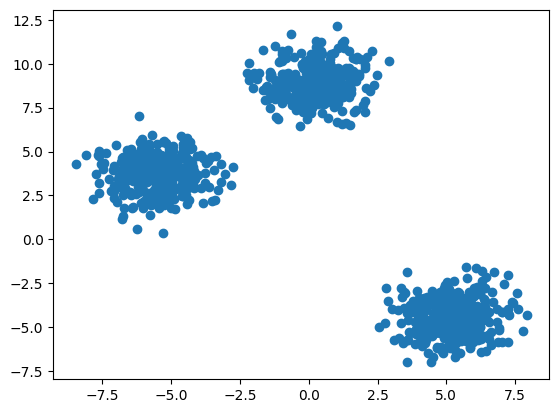

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

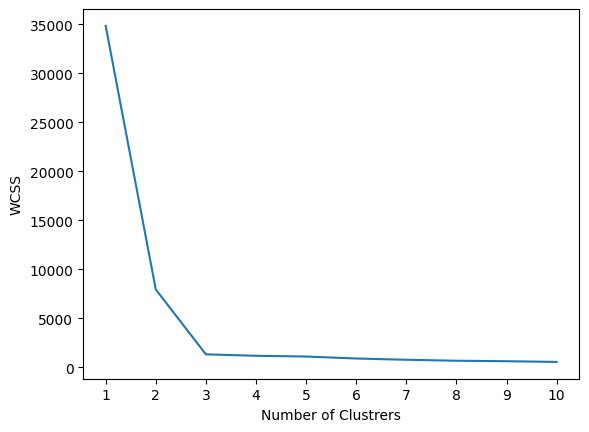

In [7]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3,init="k-means++")
y_labels = kmeans.fit_predict(X_train)

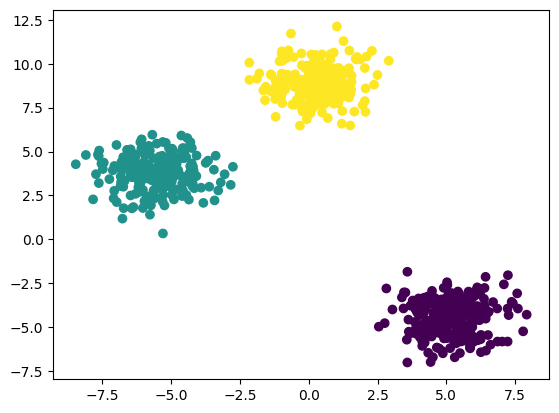

In [9]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [10]:
## knee locator
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from kneed import KneeLocator

k1 = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [12]:
## Silhoutte score
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

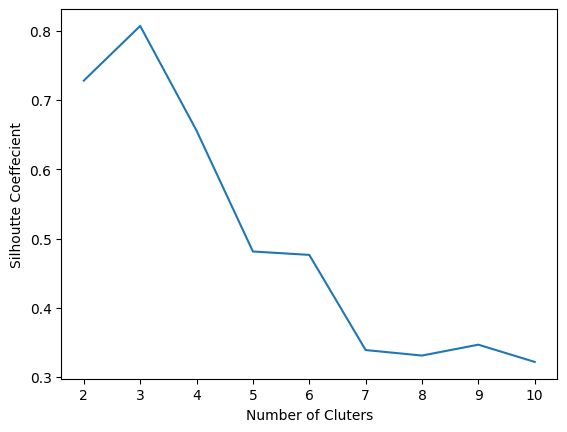

In [13]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()